In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder

In [2]:
df=pd.read_csv("Housing.csv")
df.head(2)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [4]:
df.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [5]:
# no null values in data

In [6]:
#using boxplot to visualise any outliers presence

In [7]:
df_numeric= df.select_dtypes(include='number')

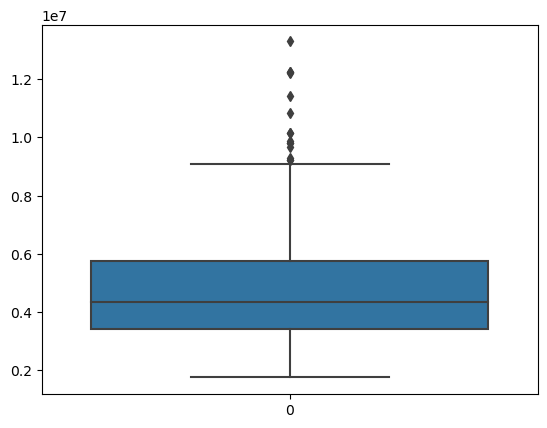

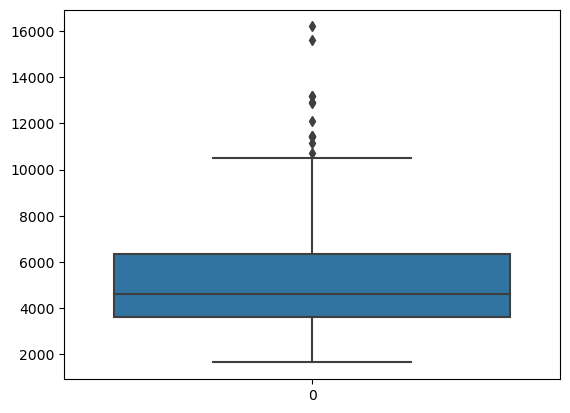

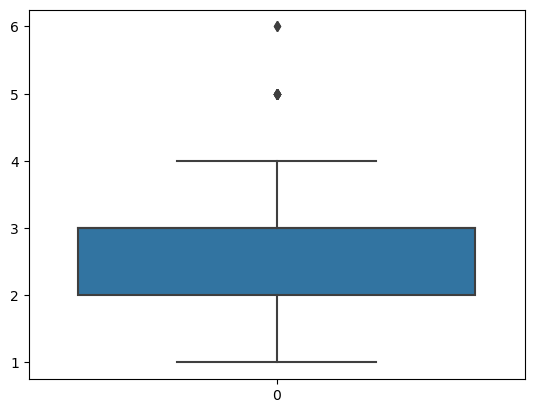

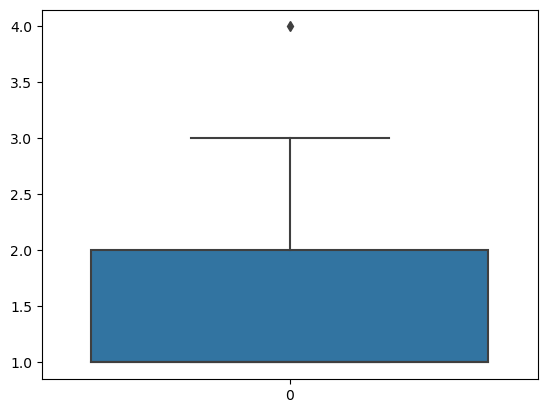

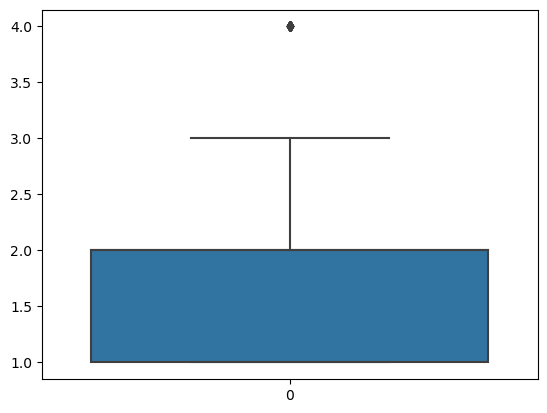

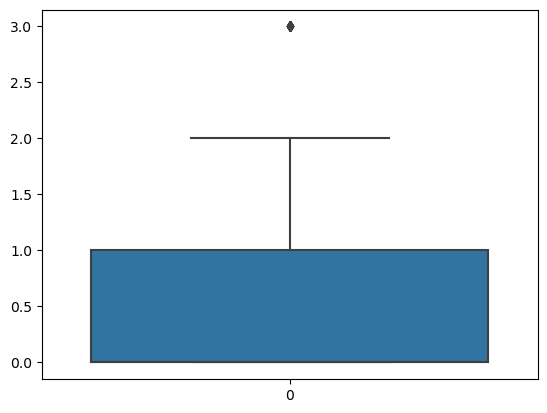

In [8]:
for i in df_numeric.columns:
    sns.boxplot(df_numeric[i])
    plt.show()

In [9]:
# The presence of outliers is indicated

In [10]:
# since the obeservations are very few.. we try not removing outliers

# visualising numeric variables

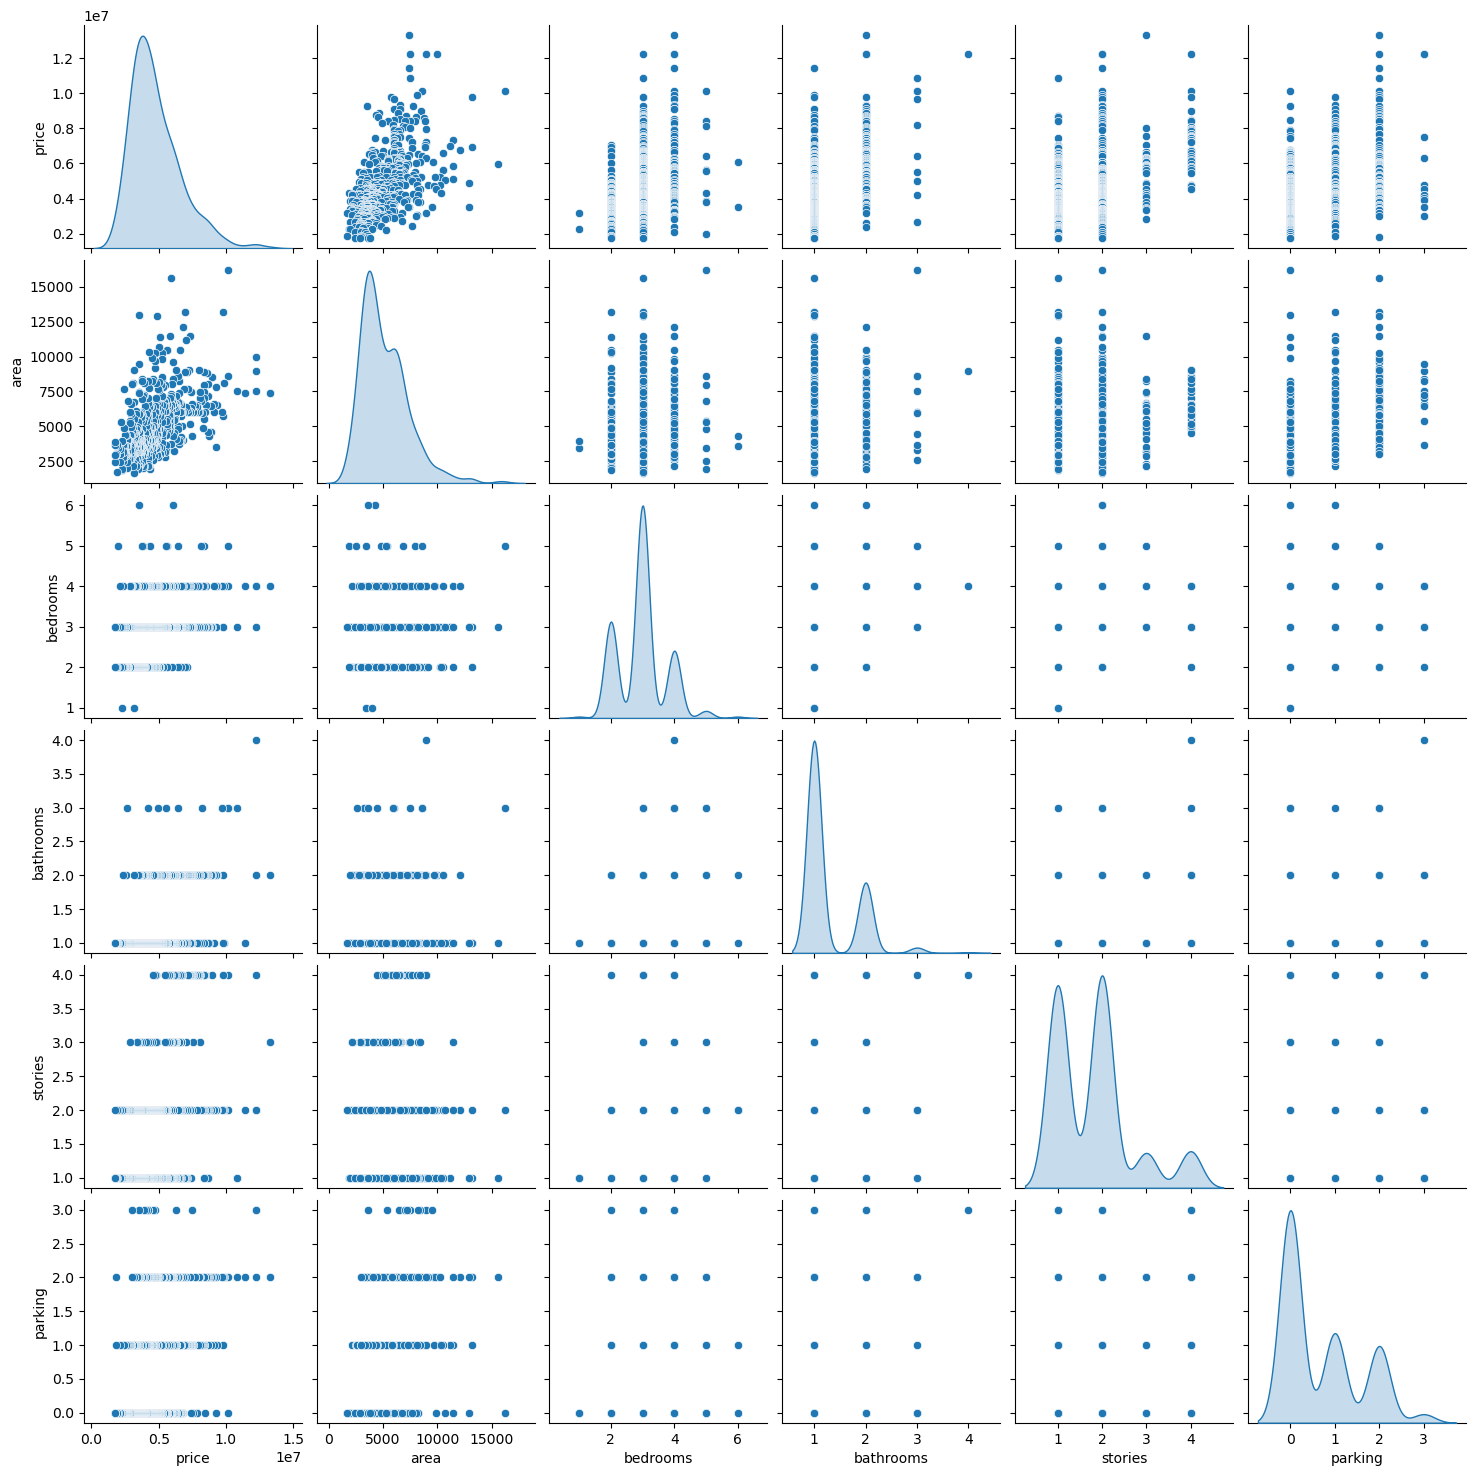

In [11]:
sns.pairplot(df,diag_kind='kde')
plt.show()

In [12]:
# visualising categorical variables with price 
# considering the features of house varies the price also varies

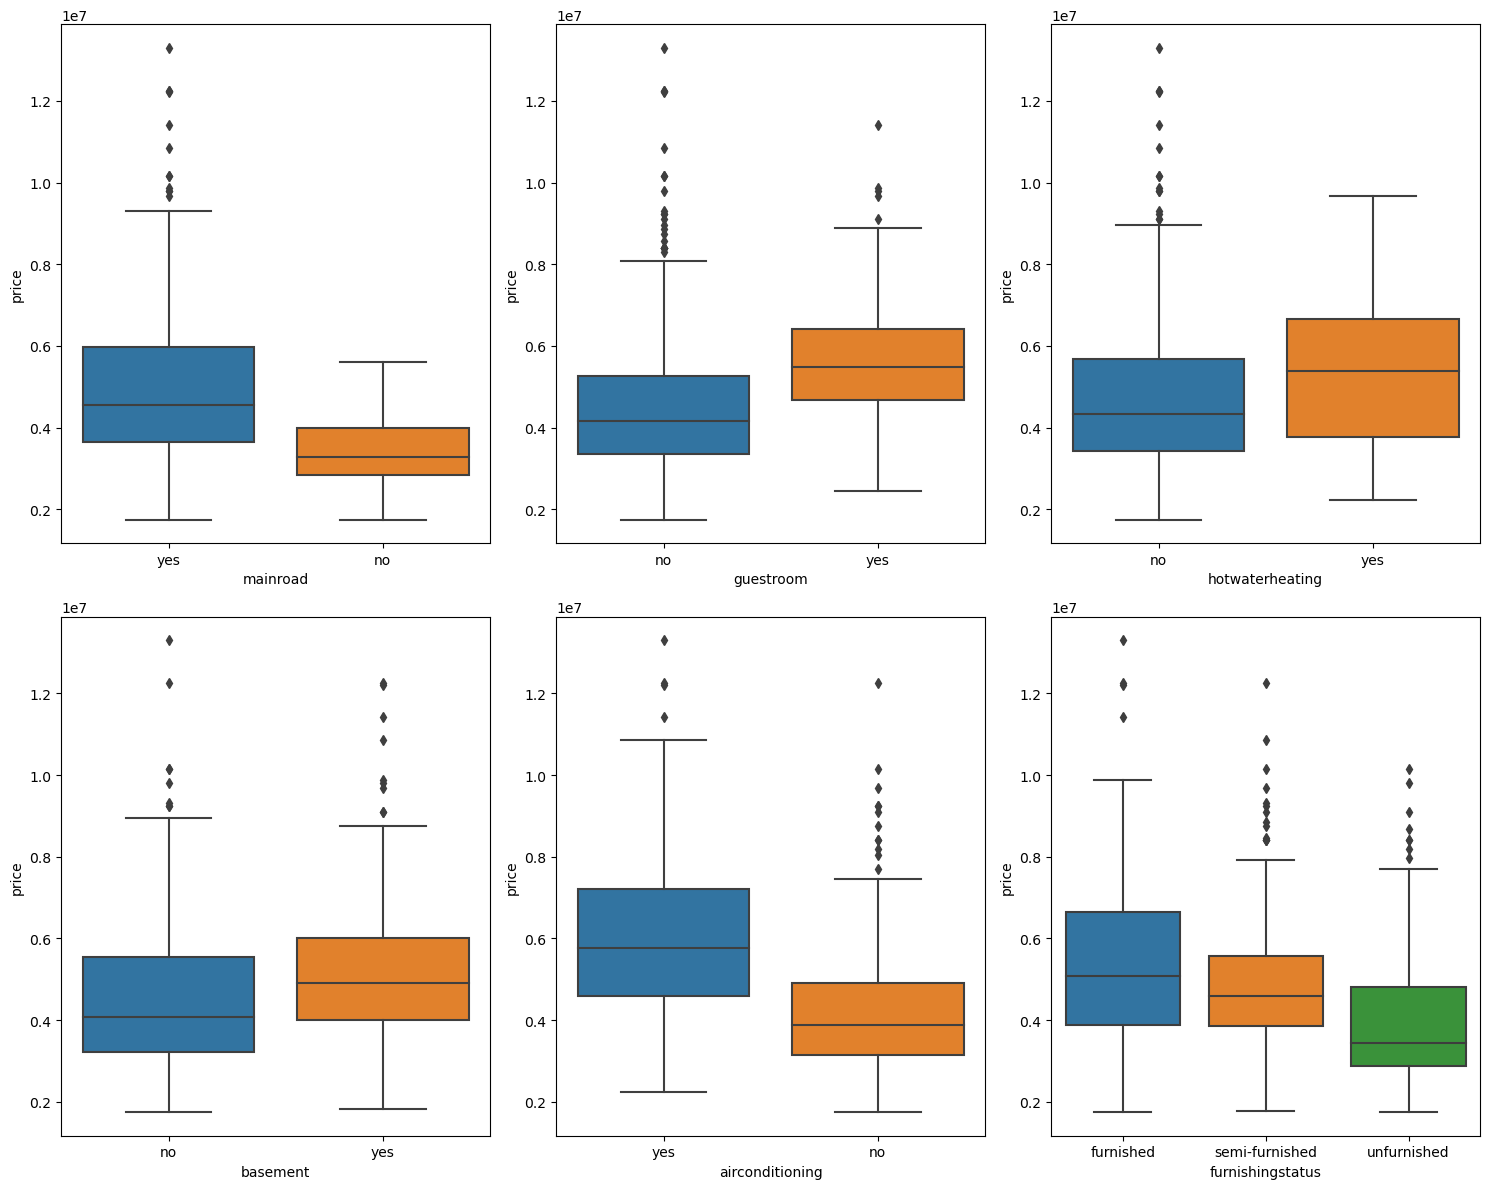

In [13]:
# bivariant 
plt.figure(figsize=(15,12))
plt.subplot(2,3,1)
sns.boxplot(x='mainroad',y='price',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='guestroom',y='price',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='hotwaterheating',y='price',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='basement',y='price',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='airconditioning',y='price',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='furnishingstatus',y='price',data=df)
plt.tight_layout()
plt.show()

In [14]:
# if we look at the above boxplot the houses which are on mainroad, having guestroom, having hotwater facility,
# with basement, airconditioning and semi furinished and fully furnished are expensive and more than compared to 
# houses with not havng most facilities

In [15]:
df.replace({'yes': 1, "no": 0},inplace=True)
# replacing object variables 'YES' and "NO" to one and zero

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
dtypes: int64(12), object(1)
memory usage: 55.5+ KB


In [17]:
# encoding furnishing status

In [18]:
encoded_furniture=pd.get_dummies(df['furnishingstatus'],drop_first=True).astype('uint8')


In [19]:
df= pd.concat([df, encoded_furniture], axis = 1)
df

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,1,0,1,0,0,2,0,unfurnished,0,1
541,1767150,2400,3,1,1,0,0,0,0,0,0,0,semi-furnished,1,0
542,1750000,3620,2,1,1,1,0,0,0,0,0,0,unfurnished,0,1
543,1750000,2910,3,1,1,0,0,0,0,0,0,0,furnished,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    int64 
 6   guestroom         545 non-null    int64 
 7   basement          545 non-null    int64 
 8   hotwaterheating   545 non-null    int64 
 9   airconditioning   545 non-null    int64 
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    int64 
 12  furnishingstatus  545 non-null    object
 13  semi-furnished    545 non-null    uint8 
 14  unfurnished       545 non-null    uint8 
dtypes: int64(12), object(1), uint8(2)
memory usage: 56.5+ KB


In [21]:
# we can drop furnishingstatus now

In [22]:
df.drop('furnishingstatus',axis=1,inplace=True)

In [23]:
# standardising the data
from sklearn.preprocessing import MinMaxScaler

In [24]:
mm=MinMaxScaler()
df_scaled=pd.DataFrame(mm.fit_transform(df),columns=df.columns)
df_scaled

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000,0.000000,1.0,0.0,1.0,0.0,0.0,0.666667,0.0,0.0,1.0
541,0.001485,0.051546,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.0
542,0.000000,0.135395,0.2,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0
543,0.000000,0.086598,0.4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


<Axes: >

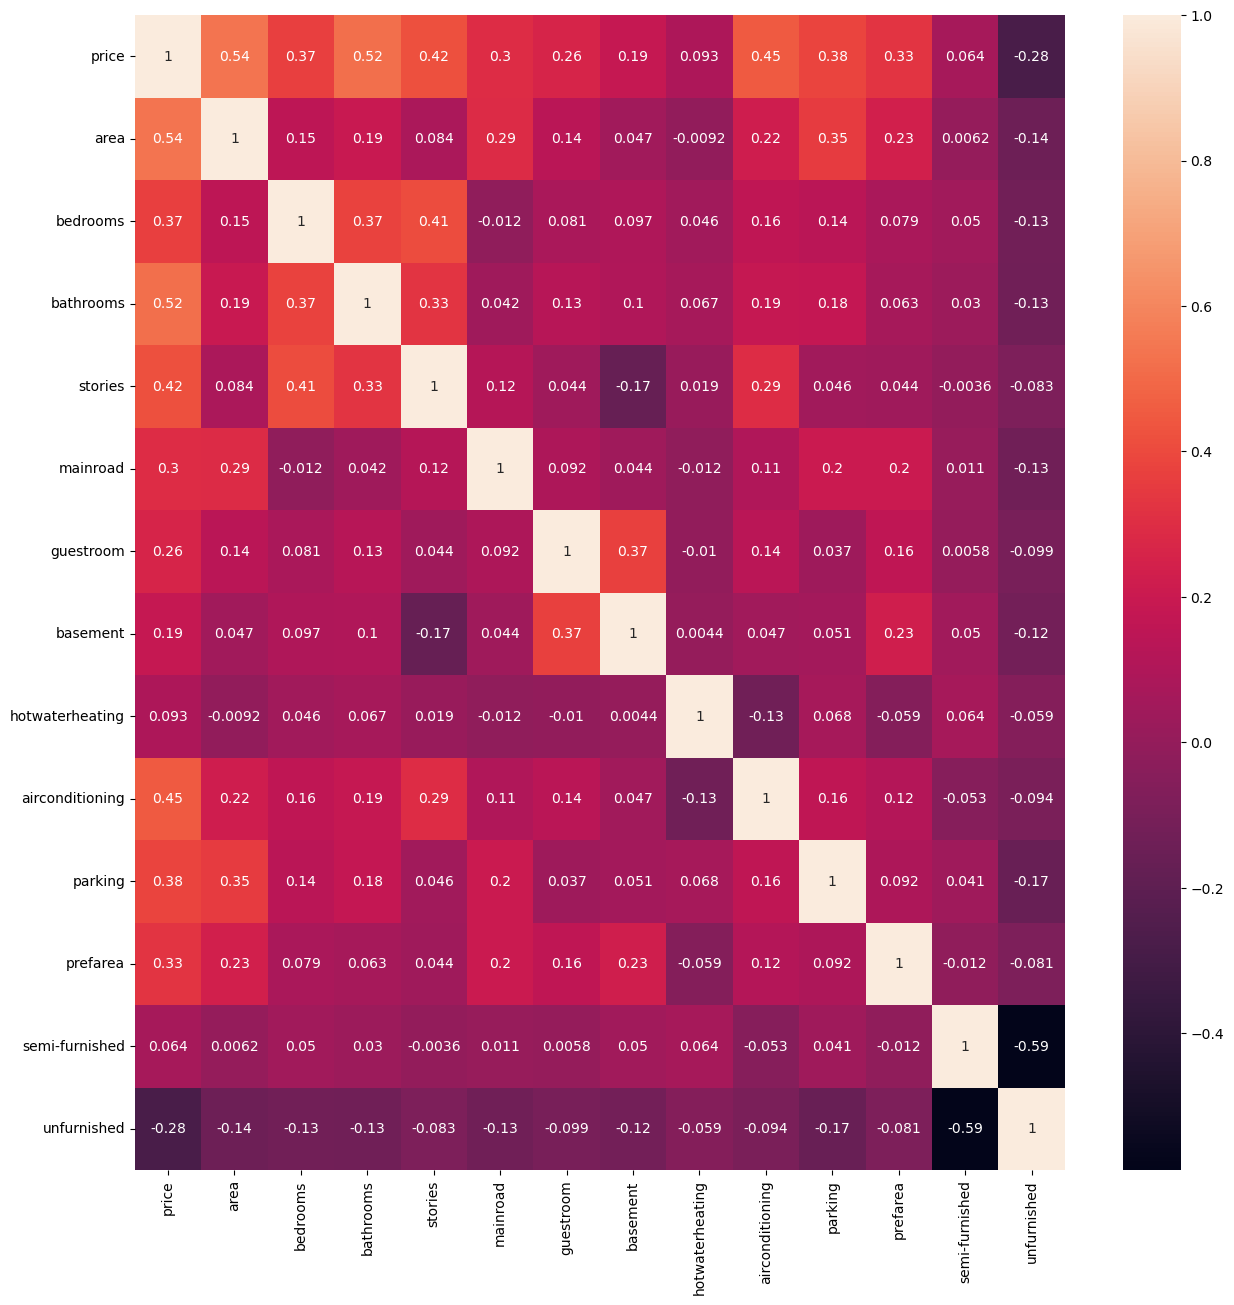

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(df_scaled.corr(),annot=True)

In [26]:
# Area,bathroms,bedrooms,stories with price seems to have a good correlation,


 ## Splitting the Data into Training and Testing Sets

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X=df_scaled.drop('price',axis=1)
y=df_scaled['price']


In [29]:

xtrain,xtest,ytrain,ytest= train_test_split(X,y, test_size = 0.2, random_state = 100)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((436, 13), (109, 13), (436,), (109,))

## Model Building

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
lin_reg = LinearRegression()
# train the model with input and output data - train
model = lin_reg.fit(xtrain,ytrain)

#test the model with input  data - test
y_pred = model.predict(xtest)
lin_reg.fit(xtest,y_pred)

LinearRegression()

In [32]:
#Model Evaluation 

In [33]:
from sklearn.metrics import mean_squared_error,r2_score

In [34]:
# model evaluation for training set
y_pred = lin_reg.predict(xtrain)
rmse = (np.sqrt(mean_squared_error(ytrain, y_pred)))
print("rmse:",rmse)
# R square value - training dataset
r2 =  r2_score(ytrain, y_pred)
print("R- Square:",r2)

rmse: 0.09160650416956634
R- Square: 0.6781789392869301


In [35]:
# model evaluation for testing set
y_pred = lin_reg.predict(xtest)
rmse = (np.sqrt(mean_squared_error(ytest, y_pred)))
print("rmse:",rmse)
r2 =  r2_score(ytest, y_pred)
print("R- Square:",r2)

rmse: 0.09191877175078576
R- Square: 0.6806539407870682


### OLS - model summary

In [36]:
import statsmodels.api as sm
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.912
Model:                            OLS   Adj. R-squared (uncentered):              0.909
Method:                 Least Squares   F-statistic:                              421.6
Date:                Mon, 27 Nov 2023   Prob (F-statistic):                   3.45e-270
Time:                        15:07:26   Log-Likelihood:                          530.67
No. Observations:                 545   AIC:                                     -1035.
Df Residuals:                     532   BIC:                                     -979.4
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
area                0.3137      0.030     10.399      0.000       0.254       0.373
bedrooms            0.0707      0.026      2.727      0.007       0.020       0.122
bathrooms           0.2531      0.027      9.480      0.000       0.201       0.306
stories             0.1161      0.017      6.974      0.000       0.083       0.149
mainroad            0.0443      0.010      4.260      0.000       0.024       0.065
guestroom           0.0260      0.011      2.281      0.023       0.004       0.048
basement            0.0315      0.009      3.318      0.001       0.013       0.050
hotwaterheating     0.0751      0.019      3.890      0.000       0.037       0.113
airconditioning     0.0756      0.009      8.077      0.000       0.057       0.094
parking             0.0718      0.015      4.721      0.000       0.042       0.102
prefarea            0.0558      0.010      5.574      0.000       0.036       0.075
semi-furnished      0.0009      0.009      0.100      0.921      -0.017       0.019
unfurnished        -0.0292      0.009     -3.075      0.002      -0.048      -0.011
==============================================================================
Omnibus:                       90.675   Durbin-Watson:                   1.240
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              232.079
Skew:                           0.841   Prob(JB):                     4.02e-51
Kurtosis:                       5.718   Cond. No.                         11.1
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Building random forest model with all features to find out the feature importance

In [37]:
 from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators = 100, max_depth = 10)
forest.fit(xtrain,ytrain)

RandomForestRegressor(max_depth=10)

In [38]:
y_pred=forest.predict(xtest)

In [39]:
rmse=np.sqrt(mean_squared_error(ytest,y_pred))
rmse

0.0963470346104841

In [40]:
r2_score(ytest,y_pred)

0.6491432461227882

<Figure size 2000x1500 with 0 Axes>

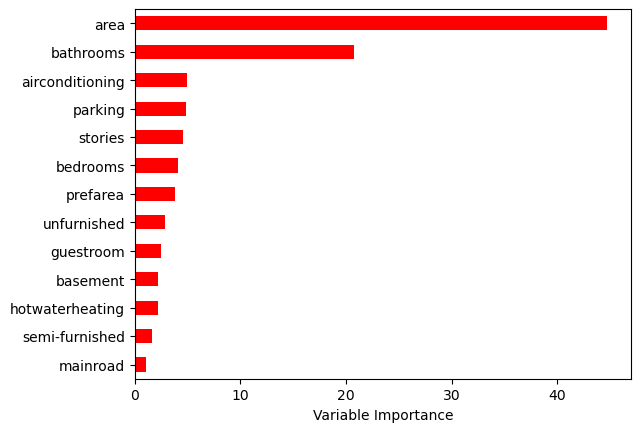

<Figure size 2000x1500 with 0 Axes>

In [41]:
Importance = pd.DataFrame({'Importance':forest.feature_importances_*100}, index=xtrain.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='r', )
plt.xlabel('Variable Importance')
plt.gca().legend_ = None
plt.figure(figsize=(20,15))

In [42]:
Importance.sort_values('Importance', axis=0, ascending=False)

,Importance
area,44.750199
bathrooms,20.754096
airconditioning,4.918742
parking,4.817895
stories,4.517445
bedrooms,4.048446
prefarea,3.763245
unfurnished,2.891752
guestroom,2.485536
basement,2.240064


In [43]:
# area and bathrooms explain 65 percent variance togetehr considering they are the most important features

In [44]:
# creating new X based on selective features 
# taking features that cpuld give 85% variance together
X_new=df_scaled.drop(['unfurnished','guestroom','basement','hotwaterheating','semi-furnished','mainroad'],axis=1)
Y=df_scaled['price']

In [48]:
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.linear_model import Ridge,Lasso

In [49]:
LR=LinearRegression()
Ridge_R=Ridge(alpha=0.5)
Lasso_R=Lasso(alpha=0.1)

In [53]:
kf=KFold(n_splits=3,shuffle=True,random_state=2)
for model, name in zip([LR,Ridge_R,Lasso_R],['Ridge','Lasso']):
    rmse=[]
    for train,test in kf.split(X_new,Y):
        x_train,x_test=X_new.iloc[train,:],X_new.iloc[test,:]
        y_train,y_test=Y.iloc[train],Y.iloc[test]
        model.fit(x_train,y_train)
        Y_predict=model.predict(x_test)
        rmse.append(np.sqrt(metrics.mean_squared_error(y_test,Y_predict)))
    print(rmse)
    print("Cross_Validated_rmse_score: %0.03f (+/- %0.5f) [%s]" % (np.mean(rmse),np.var(rmse,ddof=1),name))

[1.2334373077647615e-16, 1.661481330599047e-16, 8.773567958375563e-17]
Cross_Validated_rmse_score: 0.000 (+/- 0.00000) [Ridge]
[0.012877039040894732, 0.011901611855598371, 0.012292062950779137]
Cross_Validated_rmse_score: 0.012 (+/- 0.00000) [Lasso]
